In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk as nlp
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
fake_df = pd.read_csv('data/Fake.csv')
true_df = pd.read_csv('data/True.csv')

print(f"Fake news dataset has: {fake_df.shape[0]} rows")
print(f"Fake news dataset has: {fake_df.shape[1]} columns")

Fake news dataset has: 23481 rows
Fake news dataset has: 4 columns


In [4]:
fake_df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [5]:
true_df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [6]:
# Adding 'Fake' column to our datasets then join them together
fake_df['Fake'] = 1
true_df['Fake'] = 0
df = pd.concat([fake_df, true_df])
print(df)

                                                   title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
0      Donald Trump just couldn t wish all Americans ...       News   
1      House Intelligence Committee Chairman Devin Nu...       News   
2      On Friday, it was revealed that former Milwauk...       New

<AxesSubplot: xlabel='Fake', ylabel='count'>

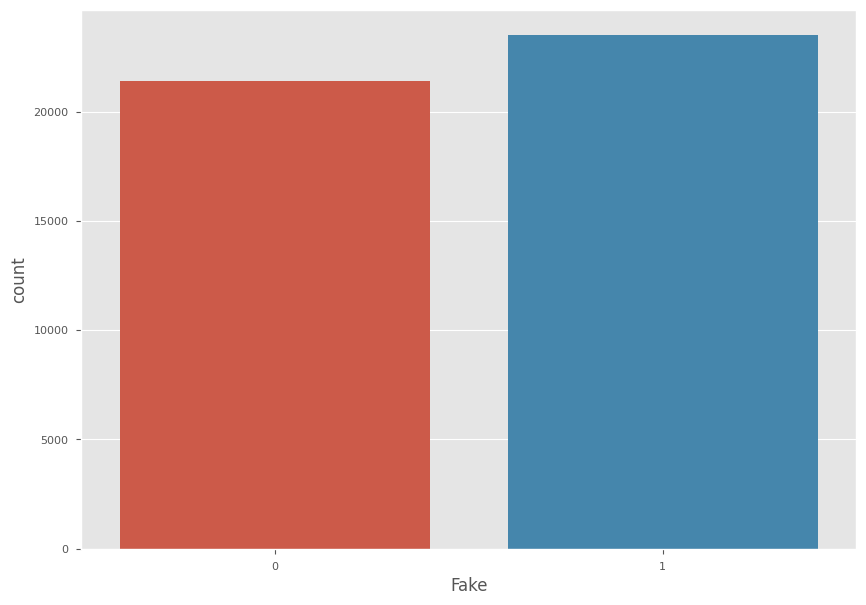

In [33]:
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month

plt.style.use('ggplot')
plt.figure(figsize=(10, 7))
sns.countplot(data = df, x = 'Fake')

C:\Users\Asus\AppData\Local\Temp\ipykernel_11228\3099058503.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


<AxesSubplot: xlabel='Year', ylabel='count'>

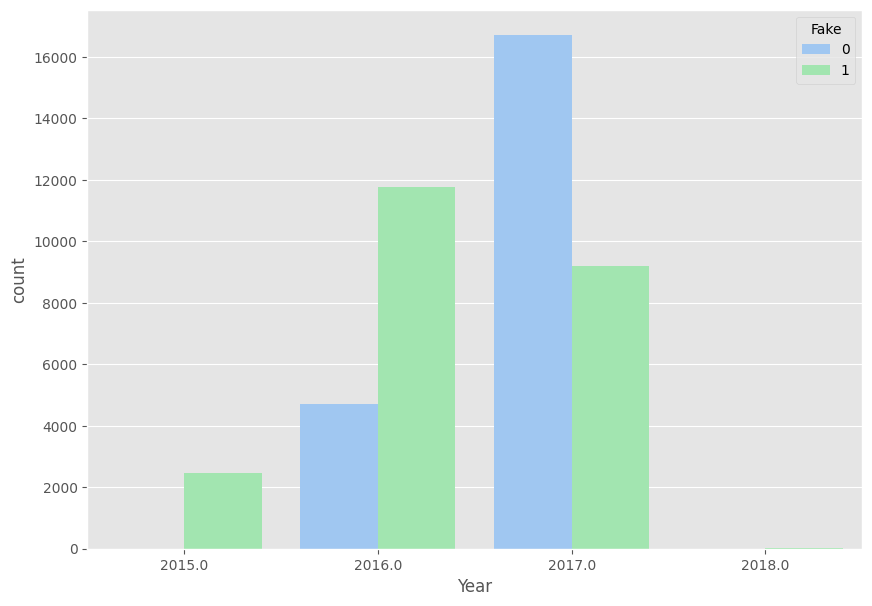

In [8]:
plt.style.use('seaborn-pastel')
plt.figure(figsize = (10, 7))
sns.countplot(data = df, x = "Year", hue = "Fake")

<AxesSubplot: xlabel='Month', ylabel='count'>

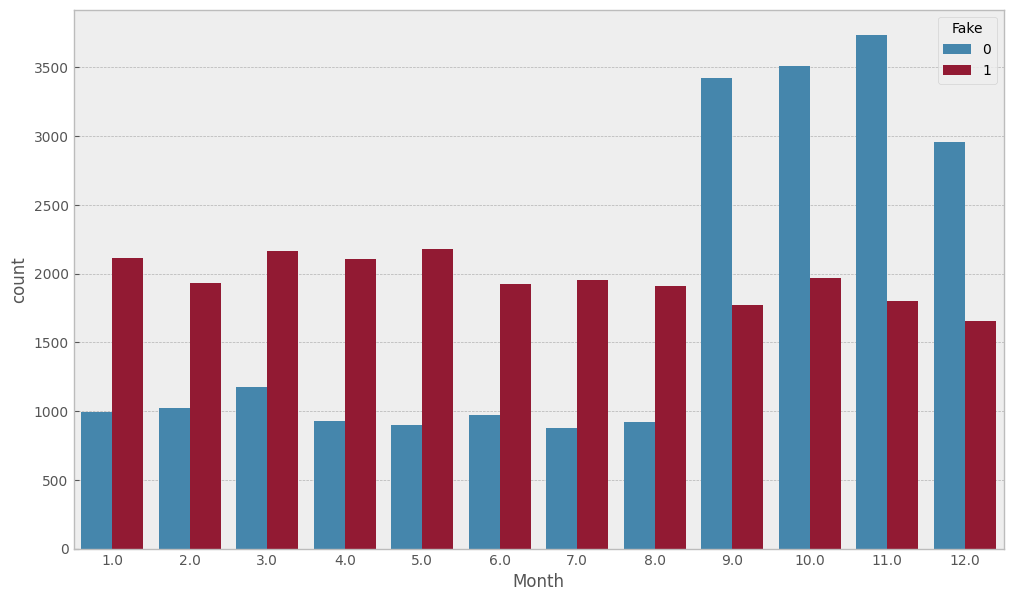

In [9]:
plt.style.use('bmh')
plt.figure(figsize = (12, 7))
sns.countplot(data = df, x = "Month", hue="Fake")

In [10]:
df.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

C:\Users\Asus\AppData\Local\Temp\ipykernel_11228\2804211826.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-paper')


<AxesSubplot: xlabel='Year', ylabel='count'>

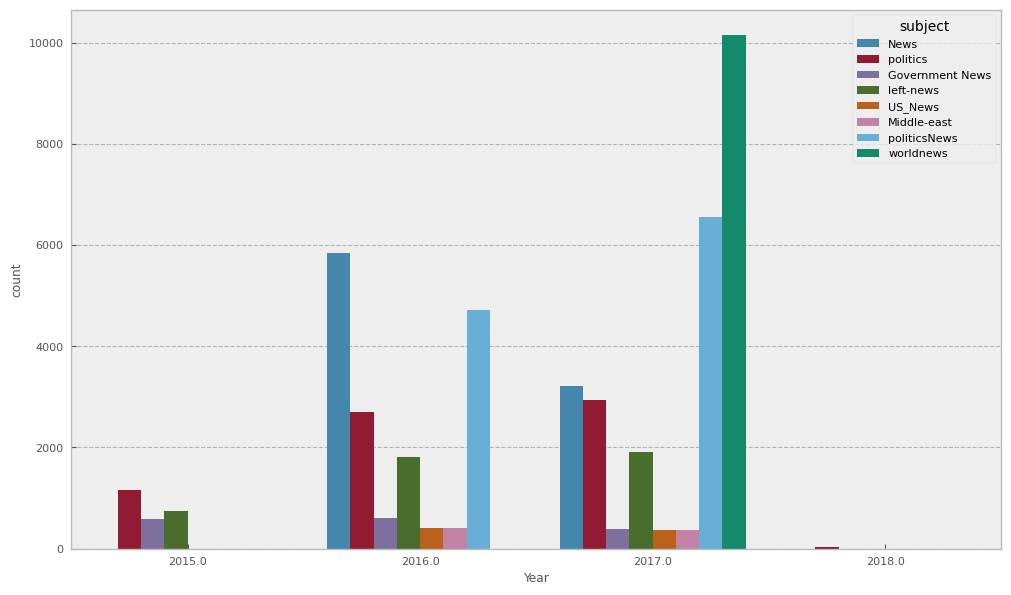

In [11]:
plt.style.use('seaborn-paper')
plt.figure(figsize=(12, 7))
sns.countplot(data = df, x = "Year", hue="subject")

In [12]:
nlp.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
df['full_text'] = df['title'] + ' ' + df['subject']

In [15]:
df.head()

,title,text,subject,date,Fake,Year,Month,full_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,1,2017.0,12.0,Donald Trump Sends Out Embarrassing New Year’...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,1,2017.0,12.0,Drunk Bragging Trump Staffer Started Russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,1,2017.0,12.0,Sheriff David Clarke Becomes An Internet Joke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,1,2017.0,12.0,Trump Is So Obsessed He Even Has Obama’s Name...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,1,2017.0,12.0,Pope Francis Just Called Out Donald Trump Dur...


In [35]:
y = df['Fake']
x = df.drop('Fake', axis = 1)

df.tail()

,title,text,subject,date,Fake,Year,Month,full_text
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,2017-08-22,0,2017.0,8.0,'fulli committed' nato back new u.s. approach ...
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,2017-08-22,0,2017.0,8.0,exisnexi withdrew two product chines market wo...
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,2017-08-22,0,2017.0,8.0,insk cultur hub becom author worldnew
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,2017-08-22,0,2017.0,8.0,atican upbeat possibl pope franci visit russia...
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,2017-08-22,0,2017.0,8.0,ndonesia buy $1.14 billion worth russian jet w...


In [17]:
def stemming_process(y):
    first_step = re.sub(r"^[A-Za-z]", ' ', y).lower()
    second_step = first_step.split()
    porter_stemmer = PorterStemmer()
    result = []
    for w in second_step:
        if w not in stopwords.words('english'):
            result.append(porter_stemmer.stem(w))
    return ' '.join(result)


In [18]:
df['full_text'] = df['full_text'].apply(stemming_process)

In [39]:
X = df['full_text'].to_numpy()
y = df['Fake'].to_numpy()

X

array(['donald trump send embarrass new year’ eve message; disturb news',
       'drunk brag trump staffer start russian collus investig news',
       'sheriff david clark becom internet joke threaten poke peopl ‘in eye’ news',
       ..., 'insk cultur hub becom author worldnew',
       'atican upbeat possibl pope franci visit russia worldnew',
       'ndonesia buy $1.14 billion worth russian jet worldnew'],
      dtype=object)

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

X

<44898x20043 sparse matrix of type '<class 'numpy.float64'>'
	with 477807 stored elements in Compressed Sparse Row format>

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# y_train
# y_test

In [30]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

In [27]:
# def output_lable(n):
#     if n == 0:
#         return "Fake News"
#     elif n == 1:
#         return "Real News"
    
# def manual_testing(news):
#     testing_news = {"text":[news]}
#     new_def_test = pd.DataFrame(testing_news)
#     new_def_test["text"] = new_def_test["text"].apply(stemming_process) 
#     new_x_test = new_def_test["text"]
#     new_xv_test = vectorizer.transform(new_x_test)
#     pred_LR = LR.predict(new_xv_test)
#     pred_DT = DT.predict(new_xv_test)
#     pred_GBC = GBC.predict(new_xv_test)
#     pred_RFC = RFC.predict(new_xv_test)

#     return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),
#                                                                                                               output_lable(pred_DT[0]), 
#                                                                                                               output_lable(pred_GBC[0]), 
#                                                                                                               output_lable(pred_RFC[0])))

In [28]:
# news = str(input())
# manual_testing(news)

NameError: name 'wordopt' is not defined

In [54]:
print(X_test)
prediction = lg.predict(X_test)
# prediction
# new_data = ["Obama", "Was", "Cheated"]
# x = np.array(new_data)
# x = x.reshape(-1, 1)
# prediction = lg.predict(x)
# prediction = lg.predict(["Steve jobs is nice"])
# accuracy = accuracy_score(prediction, y_test)

# print(f"Model precision : {accuracy}" )

  (0, 20041)	0.4037388879102099
  (0, 18956)	0.20172538959400793
  (0, 17021)	0.3141926583911587
  (0, 6030)	0.3271322694704153
  (0, 4253)	0.19184092732435848
  (0, 4243)	0.30185455924659504
  (0, 4052)	0.30578855274704536
  (0, 3857)	0.26808301550313585
  (0, 3550)	0.3525485009210186
  (0, 3006)	0.17770659855406162
  (0, 438)	0.3760384156812705
  (1, 17046)	0.44153875063862197
  (1, 15973)	0.3300114902119185
  (1, 15566)	0.22811586211381588
  (1, 13792)	0.14298864320053753
  (1, 11899)	0.3311018495836008
  (1, 5513)	0.366117546516297
  (1, 4221)	0.42602663526006684
  (1, 1980)	0.445515614501361
  (2, 18445)	0.37459839696695435
  (2, 16215)	0.37939300739944776
  (2, 15221)	0.30914580771394984
  (2, 15091)	0.37645962566136176
  (2, 13792)	0.11525564804195723
  (2, 10510)	0.3654732283984343
  :	:
  (11222, 12063)	0.11370256962034708
  (11222, 11616)	0.2923005165562317
  (11222, 9820)	0.36812282204127544
  (11222, 8088)	0.3320908380935807
  (11223, 18403)	0.5088864297237696
  (11223, 177